# Example from *Graph-theoretic Simplification of Quantum Circuits with the ZX-calculus*

This notebook shows how the circuit that is used as a demonstration in the paper https://arxiv.org/abs/1902.03178 is generated and simplified.

First we need to important the standard things

In [1]:
import sys; sys.path.append('..')
import random
import pyzx as zx
%config InlineBackend.figure_format = 'svg'

Now we generate the circuit. 

In [2]:
random.seed(1344) # Make sure the same circuit is generated
g = zx.generate.cliffordT(4,350,p_t=0.010) # Generate the circuit as a ZX-diagram
c = zx.Circuit.from_graph(g) # Convert it to a sequence-of-gates representation
print(c.stats())

Circuit  on 4 qubits with 350 gates.
        4 is the T-count
        346 Cliffords among which 
        109 2-qubit gates and 0 Hadamard gates.


This circuit contains many more gates then the one used in the paper. This is because ``generate.clifordT`` generates a lot of single qubit gate strings that can trivially be simplified. Before processing it with our ZX-simplification routine, we therefore process it trough the ``optimize.basic_optimization`` routine to show that our simplification routine is actually doing non-trivial simplifications.

In [3]:
c2 = zx.optimize.basic_optimization(c.split_phase_gates())
print(c2.stats())

Circuit  on 4 qubits with 195 gates.
        4 is the T-count
        191 Cliffords among which 
        86 2-qubit gates and 43 Hadamard gates.


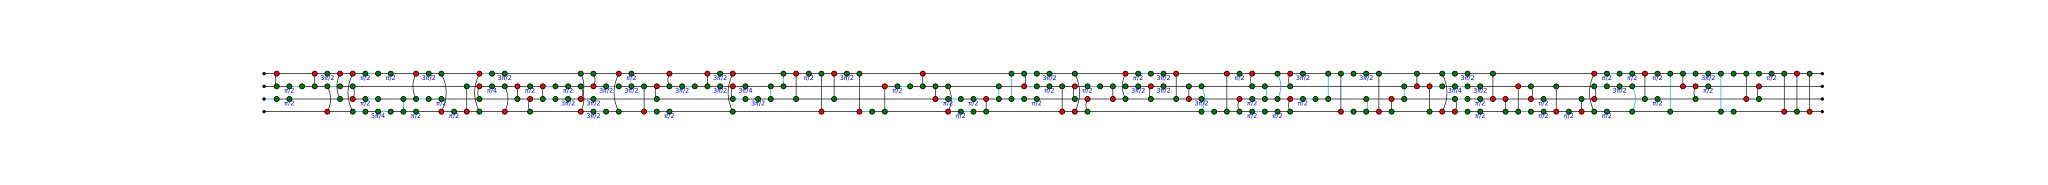

In [4]:
g = c2.to_graph()
zx.draw(g,figsize=(35,3))

Now we simplify our circuit

spider_simp: 58. 37. 17. 11. 4.  5 iterations
id_simp: 1.  1 iterations
spider_simp: 8. 1.  2 iterations
pivot_simp: 15. 6. 2. 2.  4 iterations
lcomp_simp: 33. 12. 11. 6. 6. 4. 4. 4. 3. 1. 1. 1. 1.  13 iterations


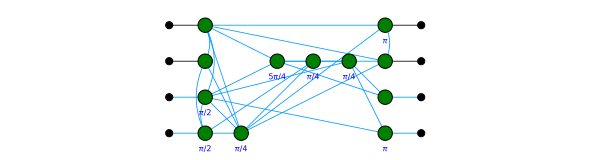

In [5]:
zx.simplify.clifford_simp(g) # This does the simplification routine from the paper
g.normalise() # This simply puts the circuit in a more compact format, that allows easy visualisation
zx.draw(g)

Finally we extract a circuit from this diagram.

Circuit  on 4 qubits with 41 gates.
        4 is the T-count
        37 Cliffords among which 
        21 2-qubit gates and 12 Hadamard gates.


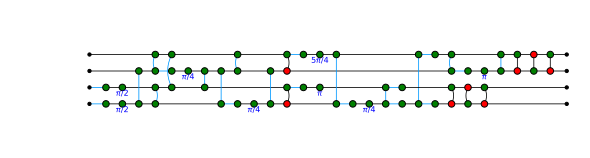

In [6]:
c = zx.extract.streaming_extract(g.copy())
print(c.to_basic_gates().stats())
zx.draw(c)